# **ELG 7172B : **: Homework 10 Solutions

Solutions to the problems were provided by Xunzhe Wen and Xioayan Li with modifications made by Prof. Bolic.


### Instructions:

+ Upload your answers in an ipython notebook to UOttawa Bright Space.

+ Your individual submissions should use the following filenames: ELG_7172B_YOURNAME_HW0.ipynb

+ Your code should be in code cells as part of your ipython notebook. Do not use a different format. 

+ **Do not just send your code. The homework solutions should be in a report style. Be sure to add comments to your code as well as markdown cells where you describe your approach and discuss your results. **

+ Please submit your notebook in an **executed** status, so that we can see all the results you computed. However, we will still run your code and all cells should reproduce the output when executed. 

+ If you have multiple files (e.g. you've added code files or images) create a tarball for all files in a single file and name it: ELG_7172B_YOURNAME_HW10.tar.gz or ELG_7172B_YOURNAME_HW10.zip


### Have Fun!
_ _ _ _ _

# Noisy Pendulum Model
This material is from the book: S. Sarrka, Bayesian Filtering and Smoothing, Cambridge University Press, 2013.

 The differential equation for a simple pendulum with unit length and mass can be written as 

$\frac{\partial^2 \alpha }{\partial x^2} = -g sin(\alpha ) + w(t)$

where $\alpha $ is the angle, g is the gravitational acceleration and $w(t)$ is a random noise process. This model can be converted 
into the following state space model:
   
$ \frac{\mathrm{d} }{\mathrm{d} t} \binom{x_{1}}{x_{2}} = \binom{x_{1}}{-gsin(x_{1})} + \binom{0}{1} w(t) $
    
where $x_{1} = \alpha $ and $x_{2} = \frac{\mathrm{d} \alpha }{\mathrm{d} x} $ . this can be seen to be special case of continuous-time and non-linear dynamic models of the form $ \frac{\mathrm{d} x }{\mathrm{d} t} $= $f(x) + Lw $
    
where f(x) is a non-linear function. We can then for example consider measuring the angular position of the pendulum, which leads to the linear 
Gaussian measurement model

  $ y_{k} = \alpha(t_{k}) + $  noise
    
But if we measure the horizontal position of the pendulum, we would get a non-linear measurement model

  $ y_{k} = sin(\alpha(t_{k})) + $  noise
    
By a suitable numerical integration scheme we can convert the non-linear dynamic model into discrete time, non-linear dynamic model, which then 
results in a model of the generic non-linear state space form 

  $ x_{k} = f(x_{k-1}, q_{k-1})$
    
  $ y_{k} = h(x_{k}, r_{k})$

where $y_{k}$ is the vector of measurements $q_{k-1} \sim N(0,Q)$ and $r_{k} \sim N(0,R)$. Estimation of the pendulum state can now be implemented using 
extended kalman filter , unscented Kalman filter (UKF) or particular filter. 
    



![alt text](image.png "Title")

Illustration of pendulum example. 
In addition to the gravitation g there is an additional unknown force component w(t). which is modeled as white noise. 

# Problem 1 
A simple discretization of the pendulum model above leads to the following model: 
        
$$\begin{bmatrix}
x_{1,k}
\\ 
x_{2,k}
\end{bmatrix}  
= 
\begin{bmatrix}
x_{1,k-1}+x_{2,k-1}\Delta t
\\ 
x_{2,k-1}-gsin(x_{1,k-1})\Delta t
\end{bmatrix}
+ q_{k-1}$$
    
where $x_{(k)}= 
\begin{bmatrix}
x_{1,k}
\\ 
x_{2,k}
\end{bmatrix}$

and $f(x_{k-1}) = 
\begin{bmatrix}
x_{1,k-1}+x_{2,k-1}\Delta t
\\ 
x_{2,k-1}-gsin(x_{1,k-1})\Delta t
\end{bmatrix} $

Also,

$y_{k} = sin(x_{1,k})+r_{k}$
    
where $q_{k-1} \sim N(0,Q)$ and $r_{k} \sim N(O,R)$ with 
    
  $Q = \begin{bmatrix}
q^{c} \Delta t^{3}/3 & q^{c} \Delta t^{2}/2\\  
q^{c} \Delta t^{2}/2 & q^{c} \Delta t\\ 
\end{bmatrix} $
    
where $q^{c}$ is the spectral density of the continous-time process noise. Assume that $  \Delta t=0.01 $, g  = 9.81, $q^{c}=0.01$, R  = 0.1. Please note that Q and R are coveriance matrices.

Estimate the position of pendulum over time using particle filter. Compare your estimate with the true values. Observed values $y$ are store in the file Pendulum.txt  - this is your input that you need to read sequentially. 

(You can use FilterPy implementation https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python.)

In [8]:
#Q1: Solution

# import data
#ys=np.loadtxt("./Pendulum.txt")
ys=np.array([ 0.728101,  0.861567,  0.692165,  0.761718,  1.347517,  0.911031,
        1.177649,  0.69013 ,  1.026086,  0.479501,  0.996603,  1.247329,
        0.675735,  0.870936,  0.490682,  0.919404,  0.933003,  1.429757,
        1.173713,  1.076998,  1.490167,  0.896145,  0.807578,  1.317742,
        0.769446,  0.880223,  0.823213,  1.185577,  0.898953,  1.676995,
        1.323666,  0.837684,  1.117147,  0.621061,  1.006367,  0.869907,
        0.97988 ,  0.674297,  0.783706,  0.777425,  0.385709,  0.760711,
        0.177158,  0.311708,  0.573574,  0.552964,  0.154433,  0.91964 ,
        0.299565,  0.47507 ,  0.262981,  0.241441,  0.995511,  0.287979,
        0.635729,  0.180168,  0.554535, -0.365908, -0.08114 , -0.5654  ,
       -0.415548, -0.183511, -0.465382, -0.590743, -0.308652, -0.520772,
       -0.739103, -0.873058, -0.140925, -0.640644, -0.405021, -0.359662,
       -0.862135, -0.543178, -0.752013, -1.440379, -0.905714, -0.909384,
       -0.408723, -1.239748, -0.965381, -1.031028, -0.745488, -0.344618,
       -0.979994, -1.604205, -0.638048, -0.686236, -0.919275, -1.192616,
       -1.123533, -0.899773, -1.036502, -1.109651, -1.207154, -0.823327,
       -1.240801, -1.363881, -1.394584, -0.993319, -1.522818, -1.015176,
       -0.727265, -1.175376, -0.808939, -1.297581, -0.361385, -1.281294,
       -1.189233, -0.733839, -0.846308, -1.451203, -1.412926, -0.900884,
       -1.290265, -0.915476, -1.051471, -0.881431, -1.199826, -0.583537,
       -0.716717, -0.489956, -1.170837, -0.756796, -0.663819, -1.197287,
       -1.439392, -0.970546, -0.328177, -1.269962, -0.523438, -0.968614,
       -0.959329, -1.631639, -0.8468  , -0.817105, -0.634035, -1.083533,
       -0.563835, -0.946578, -1.081065, -1.550716, -1.051625, -0.626911,
       -1.134922, -1.120279, -1.445314, -0.94464 , -0.619942, -0.679845,
       -0.87017 , -1.176243, -1.187818, -0.842527,  0.076514, -0.832492,
       -0.781984, -0.191578, -0.149309, -1.260208, -0.468606, -0.548704,
       -0.555458,  0.271064, -0.305503,  0.131931, -0.558875, -0.415896,
       -0.337773, -0.410616,  0.075727, -0.359672, -0.119657,  0.259383,
       -0.393033, -0.047258, -0.443181,  0.211547,  0.581354, -0.402806,
        0.193587,  0.561639, -0.232149,  0.808961,  1.065355,  0.282509,
        0.172293,  0.585295, -0.299766,  0.381768,  0.859085,  0.785114,
        0.442286,  1.258283,  1.174082,  0.140411,  0.930337,  0.702686,
        0.483669,  1.09312 ,  0.683656,  0.332028,  0.89222 ,  0.920587,
        0.743871,  1.234923,  1.429707,  1.366035,  0.538441,  0.907145,
        1.033861,  0.829129,  1.354188,  0.676626,  0.618929,  0.926074,
        1.233829,  0.8583  ,  0.939647,  0.982744,  1.095867,  0.728178,
        0.940069,  0.782881,  0.217072,  0.702347,  0.978265,  1.072157,
        0.713975,  1.17403 ,  0.893678,  1.243949,  1.269307,  1.188503,
        1.20089 ,  0.983683,  1.655929,  1.090654,  0.971734,  0.761831,
        1.275479,  0.570977,  0.783451,  1.642759,  1.084559,  0.67009 ,
        1.331519,  0.488349,  0.525953,  1.415641,  1.175363,  1.421919,
        1.075888,  0.438991,  1.03745 ,  0.628916,  1.199238,  1.249201,
        1.060934,  0.644718,  0.450148,  0.688688,  1.400395,  0.726232,
        1.435304,  1.172359,  0.822749,  0.8247  ,  0.592373,  0.569918,
        1.041677,  1.099157,  0.906092,  1.034002,  0.840999,  0.331017,
        1.090099,  1.203854,  0.70761 ,  0.256681,  0.54497 ,  0.243957,
        0.463898,  0.810318,  0.294879,  0.367081,  0.550185,  0.288319,
        0.740015,  0.106274, -0.353519, -0.03356 ,  0.114172,  0.052457,
       -0.258192,  0.105665, -0.239338,  0.135153, -0.0386  , -0.019561,
       -0.245014, -0.345111, -0.159004, -0.309417, -0.390467, -0.822373,
       -0.554022,  0.041326, -0.432006, -0.784651, -0.308052, -0.740544,
       -0.628288, -0.568682, -0.2882  , -0.719365, -0.9394  , -1.496188,
       -1.041073, -0.863382, -0.578154, -0.805074, -0.432299, -0.4694  ,
       -0.713473, -0.951761, -0.898613, -0.80056 , -1.632773, -1.0357  ,
       -0.961733, -0.803001, -1.155061, -1.220945, -0.999811, -1.062888,
       -1.715873, -1.240759, -1.218121, -1.621705, -1.321276, -0.936307,
       -0.505201, -1.534728, -0.754455, -1.097339, -1.066212, -1.274211,
       -1.323183, -1.095667, -0.769624, -1.156456, -0.558069, -1.168393,
       -0.986645, -0.923281, -0.879045, -1.072846, -0.440519, -1.65424 ,
       -0.566514, -1.798174, -0.591957, -0.85738 , -0.983246, -1.106322,
       -0.396754, -1.137208, -0.308531, -1.142979, -1.306374, -0.662514,
       -0.491132, -1.343476, -0.461941, -1.338484, -1.334379, -0.79056 ,
       -0.677307, -1.482584, -0.951439, -0.942158, -1.748462, -1.018868,
       -1.182103, -0.456768, -1.37802 , -1.03831 , -0.741591, -0.96818 ,
       -0.458837, -0.918336, -1.017527, -1.264077, -1.039246, -1.005302,
       -0.377079, -0.859138, -0.553493, -1.176184, -0.832021, -0.490091,
       -0.815446, -0.856175, -0.542267, -0.589182, -0.388068, -0.271139,
       -0.66222 , -0.580571, -0.41392 , -0.587354, -0.203307, -0.381413,
       -0.158828, -0.08271 , -0.351629,  0.252256, -0.309882, -0.299637,
        0.10406 ,  0.095575,  0.19712 ,  0.546272, -0.292125,  0.401814,
        0.77037 , -0.052684, -0.030602,  0.885751,  0.500086,  0.44744 ,
        0.825457,  1.236157,  1.105327,  0.604007,  0.570972,  1.034015,
        1.121429,  0.96456 ,  0.990059,  1.415665,  1.173014,  0.481832,
        0.852806,  0.523314,  0.166328,  1.307788,  0.364359,  0.759219,
        1.359596,  0.80117 ,  0.872413,  0.619713,  0.736374,  0.956184,
        1.179431,  1.218377,  1.404915,  1.608831,  0.587825,  0.840661,
        1.010892,  0.903914,  1.09591 ,  0.731957,  0.70879 ,  1.487522,
        1.869967,  1.069985,  1.463929,  1.377233,  1.21112 ,  1.089723,
        0.842981,  1.211687,  0.857595,  1.003347,  1.197299,  0.956248,
        1.160989,  1.302369,  1.198193,  0.771689,  1.210145,  1.313272,
        0.683176,  0.536219,  1.323622,  1.300479,  1.533591,  1.715359,
        1.176706,  0.86667 ,  0.988947,  1.140233,  0.96209 ,  1.221999,
        1.207483,  1.083335])

In [9]:
import numpy as np
import scipy.stats
from scipy import array, linalg, dot
import matplotlib.pyplot as plt
%matplotlib inline
from filterpy.kalman import KalmanFilter


# implement a simple particle filter: stationary non-linear Gaussian state space model
class particle_filter:
    """
    Particle filter for stationary non-linear Gaussian state space model:
    z_t = g(z_t-1) + epsilon_t
    x_t = h (z_t) + delta_t
    epsilon_t ~ N (0, Q)
    delta_t ~ N(0,R)
    Here we use z for latend variable, and x for measurement.
    """
    
    def __init__(self, g, h, Q, R, P, S, K, M):
        """
        g: non-linear transition function;
        f: non-linear observation function;
        Q: covariance of the hidden variable;
        R: covariance of the observation/visible variable;
        P: covariance of the prior to initialize z;
        S: number of particles;
        K: number of latent variables;
        M: number of visible variables.
        """
        self.g=g
        self.h=h
        self.Q=Q
        self.R=R
        self.S=S
        self.K=K
        self.M=M
        self.step_count=0
        # initialize particles
        mn=scipy.stats.multivariate_normal(mean=[1.6, 0])
        self.zs=mn.rvs(size=S).T # each column is a particle / sample
        # initialize importance weights
        #self.ws=np.ones((S,)) # set to 1
        self.ws=np.ones((S,))/S # set to 1/S

    
    def normalize_weights(self, ws):
        ws=ws/np.sum(ws)
        return ws
        
    def resample(self, ws_t, zs_t):
        #multinom=scipy.stats.multinomial(self.S, ws_t)
        #ind=multinom.rvs(size=1)
        sample=np.random.multinomial(self.S, ws_t) # ind start with 1
        
        # change sample to index
        ind=[]
        for s in range(self.S):
            ind.extend([s]*sample[s])
        
        zs_t = zs_t[:,ind]
        ws_t.fill(1/self.S)
        return zs_t,ws_t
        
        
    def compute_effective_size(self, ws):
        return 1/np.sum(ws**2)
        
    def estimate(self, zs_t, ws_t):
        # Estiamte mean and variance/covariance of hidden states.
        # Note: since the candidate distribution is unnormalized, here we need to estiamte 
        # E[f]=sum_s w_s * f(z_s) using weighted sum, NOT weighted average
    
        z_mean_t = np.sum(ws_t*zs_t, axis = 1)        
        z_mean_t.shape=(self.K,1)
        z_var_t =  (ws_t * (zs_t - z_mean_t)).dot( (zs_t - z_mean_t).T) 
        return z_mean_t,z_var_t
        
        
    def one_step(self, x_t, S_min=None):
        # sample particles (zs_t) from proposal distribution q(z_t | z_t-1, x_t) = p(z_t | z_t-1), simply use prior
        zs_t_1 = self.zs
        zs_t = np.zeros((self.K,self.S)) # K by S
        for s in range(self.S):
            p_z_t_given_t_1 = scipy.stats.multivariate_normal(mean=[0,0])  
            zs_t[:,s] = self.g(zs_t_1[:,s])+np.dot(self.Q,p_z_t_given_t_1.rvs(size=1))
            
        # compute importance weights
        ws_t_1=self.ws
        ws_t=np.zeros((self.S,))
        for s in range(self.S):
            p_x_t_given_z_t = np.exp(-(x_t-self.h(zs_t[:,s]))**2/(2*self.R))
            ws_t[s] = ws_t_1[s] * p_x_t_given_z_t
        
        # normalize importance weights
        ws_t=self.normalize_weights(ws_t)
        
        # compute effective size
        if S_min is None:
            S_min=int(0.5*self.S) 
        S_eff=self.compute_effective_size(ws_t)
        if S_eff < S_min:
            zs_t,ws_t = self.resample(ws_t, zs_t)

        # estimate mean and variance
        z_mean_t,z_var_t=self.estimate(zs_t, ws_t)
        
        # update
        self.ws=ws_t
        self.zs=zs_t
        self.x_t=x_t
        self.z_mean_t=z_mean_t
        self.z_var_t=z_var_t
        self.step_count=self.step_count+1

        return z_mean_t,z_var_t

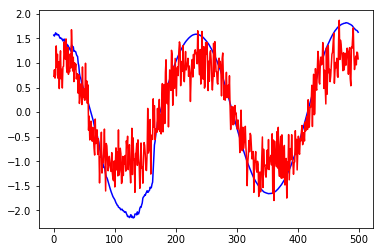

In [11]:
# Now run this model for Question1
def g(x_k_1):
    x_k=np.zeros((2,))
    delta_t=0.01
    g=9.81
    x_k[0] = x_k_1[0] + x_k_1[1]*delta_t
    x_k[1] = x_k_1[1] - g*np.sin(x_k_1[0])*delta_t 
    return x_k
    
def h(x_k):
    y_k = np.sin(x_k[0])
    return np.array([y_k])

delta_t=0.01
qc=0.01    
VAR=np.array([[(qc*delta_t**3)/3, qc*delta_t**2/2 ],[qc*delta_t**2/2, qc*delta_t]])
Q = np.linalg.cholesky(VAR) #linalg.cholesky(VAR, lower=True)
R=np.array([[0.1]])
R=np.sqrt(R)
P=np.array([[0.1,0],[0,0.1]])


pf = particle_filter(g=g, h=h, Q=Q, R=R, P=P, S=500, K=2, M=1)

T=ys.size
xs_mean=np.zeros((2,T))
#ys_mean=np.zeros((T,))
for t in range(T):
    x_mean_t,x_var_t=pf.one_step(x_t=ys[t], S_min=500)
    #print("x_mean_t={0}, x_var_t={1}".format(x_mean_t,x_var_t))
    xs_mean[:,[t]] = x_mean_t
    #print(t)
    #ys_mean[t]=h(x_mean_t[:,0])
# plot results
fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.plot(range(T), xs_mean[0,:], color='blue', label='estimated x2')
ax1.plot(range(T), ys, color='red', label='actual y')

The estimation is approximatly the observation, but we can see there existing a slightly shift between the original data and the estimations. One of the reasons can be explained as the perporties of the system. 

# Problem 2 
This problem is related to voltage measurement of the battery of the car. Every time the voltage is measured it has different value due to noise. Filtering of the noise will be done using Kalman filter. The model is as follows: <br>
$x_{k+1}=x_k$ <br>
$z_k=x_k+v_k$ <br>
$x_0=14$, <br>
$v_k \sim N(0,2)$
1.	Generate noisy data for N=50 measurements
2.	Perform Kalman or particle filtering
3.	Analyze the error covariance as the time passes
(You can use FilterPy implementation https://github.com/rlabbe/Kalman-and-Bayesian-Filters-in-Python.)


Q1: Generate the guassian noise date:

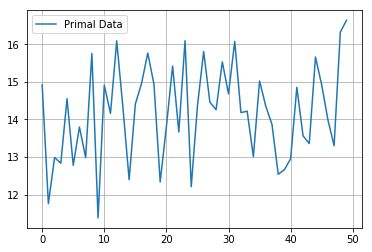

In [3]:
import numpy as np
from numpy.random import randn
import matplotlib.pyplot as plt
import math
mu = 14

sigma = 2**0.5
N = 50

v = np.random.normal(mu, sigma, N)

plt.figure()
plt.plot(v, label='Original Data')
plt.legend()
plt.grid()
plt.show()

Q2: Apply the Kalman filtering:

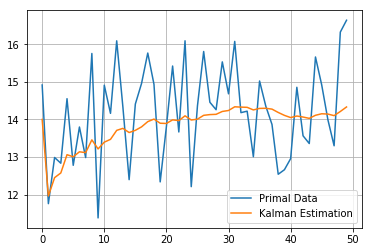

In [5]:
x0 = 14
    
N = len(v)
R = 0.1   
Q = (0.01**1.8)/1 
K=np.zeros((N,1))
X=np.zeros((N,1))
P=np.zeros((N,1))

Diff=np.zeros((N,1))

X[0] = 14  # Stautes
P[0] = 1 # covariance 
    
# Keep make predictions and update the status 
for i in range(1,N):
    K[i] = P[i-1] / (P[i-1]+R)
    Diff[i] = (v[i] - X[i-1])
    X[i] = X[i-1] + K[i] * Diff[i]
    P[i] = P[i-1] - K[i] * P[i-1] + Q        

plt.figure()
plt.plot(v, label='Original Data')
plt.plot(X,label='Kalman Estimation')
plt.legend()
plt.grid()
plt.show()

The estimator wandered around the mean value of the data, can be considered a noise cancelling filter at the case.

Q3: Tracking the error covariance:

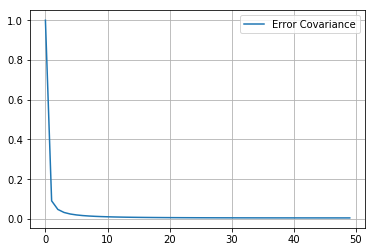

In [6]:
plt.figure()
plt.plot(P, label='Error Covariance')
plt.legend()
plt.grid()
plt.show()

As the plot indicates, the error covariance is increasing, but it finally tends to converge at a certain level. In general, the error covariance is not large in this case.